# Beta-diversity shipping 16S, for PERMANOVA adonis in qiime

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


In [4]:
from qiime2.plugins.diversity.visualizers import adonis

start with ASVs

In [18]:
import qiime2
from skbio.stats.distance import permanova, DistanceMatrix

#load distance matrices for LP5 (both the non-merged and merged tables):
#jaccard:
jaccard_dm_16S_ASV = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_ASV = jaccard_dm_16S_ASV.view(DistanceMatrix)

jaccard_dm_16S_ASV_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_ASV_merged = jaccard_dm_16S_ASV_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_ASV = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_ASV = bray_dm_16S_ASV.view(DistanceMatrix)

bray_dm_16S_ASV_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_ASV_merged = bray_dm_16S_ASV_merged.view(DistanceMatrix)

OTUs

In [19]:
jaccard_dm_16S_OTU = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_OTU = jaccard_dm_16S_OTU.view(DistanceMatrix)

jaccard_dm_16S_OTU_merged = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_OTU_merged = jaccard_dm_16S_OTU_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_OTU = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_OTU = bray_dm_16S_OTU.view(DistanceMatrix)

bray_dm_16S_OTU_merged = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_OTU_merged = bray_dm_16S_OTU_merged.view(DistanceMatrix)

kmers - no tfidf

In [20]:

jaccard_dm_16S_k = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380/filtered_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_k = jaccard_dm_16S_k.view(DistanceMatrix)

jaccard_dm_16S_k_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_jaccard_distance_matrix.qza')
# jaccard_dm_16S_k_merged = jaccard_dm_16S_k_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_k = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_k = bray_dm_16S_k.view(DistanceMatrix)

bray_dm_16S_k_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_braycurtis_distance_matrix.qza')
# bray_dm_16S_k_merged = bray_dm_16S_k_merged.view(DistanceMatrix)

kmers - with tfidf

In [8]:

jaccard_dm_16S_kt = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_kt = jaccard_dm_16S_kt.view(DistanceMatrix)

jaccard_dm_16S_kt_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf-merged/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_kt_merged = jaccard_dm_16S_kt_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_kt = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_kt = bray_dm_16S_kt.view(DistanceMatrix)

bray_dm_16S_kt_merged = qiime2.Artifact.load('16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-tfidf-merged/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_kt_merged = bray_dm_16S_kt_merged.view(DistanceMatrix)

In [10]:
shipping_general_metadata_all_samples = pd.read_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv', sep=',', index_col=0)

shipping_general_metadata_all_samples

,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,temperature,day,replicate,well,...,Evenness ASVs,Simpson ASVs,Shannon OTUs,Evenness OTUs,Simpson OTUs,Shannon kmers,Evenness kmers,Simpson kmers,color,color2
366294_121-LP4-16S-0621,244.000000,1.0,1.0,W30.02.28,E,6,30,28,2,E06,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.918076,0.998404,0.995840,#751c6d,#751c6d
366294_147-LP4-16S-0647,244.000000,1.0,1.0,W30.01.28,G,9,30,28,1,G09,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.918076,0.998404,0.995840,#751c6d,#751c6d
366294_142-LP4-16S-0642,244.000000,2.0,1.0,W17.03.28,B,9,17,28,3,B09,...,0.000000,0.000000,0.995727,0.995727,0.497041,7.918076,0.998404,0.995840,#fdc067,#fdc067
366294_175-LP4-16S-0675,361.000000,5.0,2.0,W17.03.01,C,1,17,1,3,C01,...,0.066634,0.015706,0.136859,0.068430,0.031205,7.952775,0.936077,0.995825,#332615,#fdc067
366294_200-LP4-16S-0700,366.344828,1.0,2.0,W17.01.01,D,4,17,1,1,D04,...,0.027267,0.005464,0.000000,0.000000,0.000000,7.926608,0.932997,0.995792,#332615,#fdc067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_211-LP4-16S-0711,728.000000,5.0,7.0,W30.01.01,G,5,30,1,1,G05,...,0.323106,0.269474,0.611716,0.263452,0.177119,8.411517,0.884697,0.996549,#170616,#751c6d
366294_132-LP4-16S-0632,728.000000,5.0,7.0,W04.01.28,H,7,4,28,1,H07,...,0.470056,0.444598,1.023748,0.440904,0.353560,8.665579,0.911418,0.997110,#9ec8ff,#9ec8ff
366294_224-LP4-16S-0724,728.000000,5.0,7.0,W17.03.14,D,7,17,14,3,D07,...,0.519479,0.565799,1.441522,0.620830,0.574820,9.019031,0.948593,0.997879,#d5a157,#fdc067
366294_186-LP4-16S-0686,734.000000,5.0,11.0,W17.02.05,F,2,17,5,2,F02,...,0.349573,0.420970,0.936512,0.403334,0.393186,8.850571,0.929717,0.997647,#846436,#fdc067


In [11]:
#save this to tsv:
shipping_general_metadata_all_samples.to_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.tsv', sep='\t')

check that it only contains valid identifiers and only temperature and day columns

In [13]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [15]:
from qiime2 import Metadata
metadata = Metadata.load('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.tsv')  # Adjust path to your metadata file


In [21]:
from skbio.stats.ordination import pcoa

dms = {
    'jaccard_dm_16S_ASV': jaccard_dm_16S_ASV,
   
    'bray_dm_16S_ASV ': bray_dm_16S_ASV ,

    'jaccard_dm_16S_OTU': jaccard_dm_16S_OTU,
   
    'bray_dm_16S_OTU': bray_dm_16S_OTU,
   
    'jaccard_dm_16S_k': jaccard_dm_16S_k,
  
    'bray_dm_16S_k': bray_dm_16S_k
    

    }

then, calculate adonis

In [22]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature*day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp-day.qzv')

Running ADONIS for jaccard_dm_16S_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcq6d3957/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcq6d3957/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-9jyslcpl/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_ASV ...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmph8_he9ir/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmph8_he9ir/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-km9wv9tn/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpq7j5es9t/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpq7j5es9t/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-4no3bi84/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpfere79hy/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpfere79hy/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-_wfk3agv/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpkwjwb_2m/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpkwjwb_2m/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-jqyo8ce6/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnkq2vkye/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpnkq2vkye/md.tsv temperature*day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-ic9af3ql/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


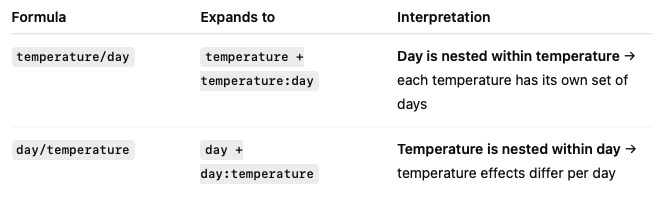

In [25]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='temperature/day',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_temp_nested_in_day.qzv')

Running ADONIS for jaccard_dm_16S_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcc2oql8z/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpcc2oql8z/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-16h6_jt_/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_ASV ...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpoonpqn__/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpoonpqn__/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-20ntkjon/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp6xfj8lek/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp6xfj8lek/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-mbl1cm9j/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpovhwkmkc/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpovhwkmkc/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-hd1r7125/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp3vtyfhlp/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp3vtyfhlp/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-10c_6nhu/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp30dkr_89/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp30dkr_89/md.tsv temperature/day 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-fao2ocz8/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [26]:
import qiime2
from qiime2.plugins.diversity.visualizers import adonis
from qiime2 import Metadata

# Run ADONIS on each distance matrix
for name, dm in dms.items():
    print(f"Running ADONIS for {name}...")
    result = adonis(
        distance_matrix=dm,
        metadata=metadata,
        formula='day/temperature',
        permutations=999
    )
    result.visualization.save(f'Stats/adonis_{name}_day_nested_in_temp.qzv')

Running ADONIS for jaccard_dm_16S_ASV...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmps3dp0ged/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmps3dp0ged/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-1p5sd5xb/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_ASV ...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp7pomy6p9/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp7pomy6p9/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-od7fum44/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp_t_vp61x/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp_t_vp61x/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-vxyh87cr/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_OTU...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpg6zpp3hm/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpg6zpp3hm/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-a7zcuh9m/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for jaccard_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp4oo475t3/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmp4oo475t3/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-5mj208df/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running ADONIS for bray_dm_16S_k...
Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmo0mcotd/dm.tsv /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/tmpmo0mcotd/md.tsv day/temperature 999 1 /var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/qiime2-temp-z64u2l_7/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


In [27]:
#import sample metadata called shipping_general_metadata_all_samples.tsv as a dataframe, index is col 'SampleID'
#import this 20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv:

shipping_general_metadata_all_samples = pd.read_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv', sep=',', index_col=0)

shipping_general_metadata_all_samples



,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,temperature,day,replicate,well,...,Evenness ASVs,Simpson ASVs,Shannon OTUs,Evenness OTUs,Simpson OTUs,Shannon kmers,Evenness kmers,Simpson kmers,color,color2
366294_121-LP4-16S-0621,244.000000,1.0,1.0,W30.02.28,E,6,30,28,2,E06,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.918076,0.998404,0.995840,#751c6d,#751c6d
366294_147-LP4-16S-0647,244.000000,1.0,1.0,W30.01.28,G,9,30,28,1,G09,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.918076,0.998404,0.995840,#751c6d,#751c6d
366294_142-LP4-16S-0642,244.000000,2.0,1.0,W17.03.28,B,9,17,28,3,B09,...,0.000000,0.000000,0.995727,0.995727,0.497041,7.918076,0.998404,0.995840,#fdc067,#fdc067
366294_175-LP4-16S-0675,361.000000,5.0,2.0,W17.03.01,C,1,17,1,3,C01,...,0.066634,0.015706,0.136859,0.068430,0.031205,7.952775,0.936077,0.995825,#332615,#fdc067
366294_200-LP4-16S-0700,366.344828,1.0,2.0,W17.01.01,D,4,17,1,1,D04,...,0.027267,0.005464,0.000000,0.000000,0.000000,7.926608,0.932997,0.995792,#332615,#fdc067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_211-LP4-16S-0711,728.000000,5.0,7.0,W30.01.01,G,5,30,1,1,G05,...,0.323106,0.269474,0.611716,0.263452,0.177119,8.411517,0.884697,0.996549,#170616,#751c6d
366294_132-LP4-16S-0632,728.000000,5.0,7.0,W04.01.28,H,7,4,28,1,H07,...,0.470056,0.444598,1.023748,0.440904,0.353560,8.665579,0.911418,0.997110,#9ec8ff,#9ec8ff
366294_224-LP4-16S-0724,728.000000,5.0,7.0,W17.03.14,D,7,17,14,3,D07,...,0.519479,0.565799,1.441522,0.620830,0.574820,9.019031,0.948593,0.997879,#d5a157,#fdc067
366294_186-LP4-16S-0686,734.000000,5.0,11.0,W17.02.05,F,2,17,5,2,F02,...,0.349573,0.420970,0.936512,0.403334,0.393186,8.850571,0.929717,0.997647,#846436,#fdc067


In [28]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

### visuals for nested effects

input format needed for plotting:
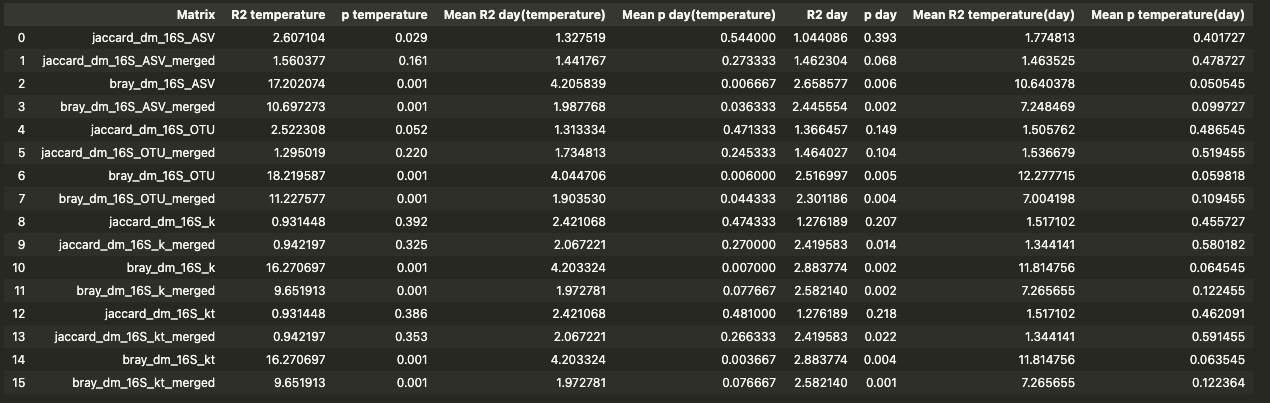

In [23]:
#import and merge the two outputs:
nested_results_df = pd.read_csv("Stats/20250514_nested_permanova_temperature_day_beta_16S.csv")
nested_results_df_2 = pd.read_csv("Stats/20250514_nested_permanova_day_temperature_beta_16S.csv")

#merge them:
nested_results_df = pd.merge(nested_results_df, nested_results_df_2, on='Matrix')

nested_results_df




,Matrix,R2 temperature,p temperature,Mean R2 day(temperature),Mean p day(temperature),R2 day,p day,Mean R2 temperature(day),Mean p temperature(day)
0,jaccard_dm_16S_ASV,2.607104,0.029,1.327519,0.544000,1.044086,0.393,1.774813,0.401727
1,jaccard_dm_16S_ASV_merged,1.560377,0.161,1.441767,0.273333,1.462304,0.068,1.463525,0.478727
2,bray_dm_16S_ASV,17.202074,0.001,4.205839,0.006667,2.658577,0.006,10.640378,0.050545
3,bray_dm_16S_ASV_merged,10.697273,0.001,1.987768,0.036333,2.445554,0.002,7.248469,0.099727
4,jaccard_dm_16S_OTU,2.522308,0.052,1.313334,0.471333,1.366457,0.149,1.505762,0.486545
5,jaccard_dm_16S_OTU_merged,1.295019,0.220,1.734813,0.245333,1.464027,0.104,1.536679,0.519455
6,bray_dm_16S_OTU,18.219587,0.001,4.044706,0.006000,2.516997,0.005,12.277715,0.059818
7,bray_dm_16S_OTU_merged,11.227577,0.001,1.903530,0.044333,2.301186,0.004,7.004198,0.109455
8,jaccard_dm_16S_k,0.931448,0.392,2.421068,0.474333,1.276189,0.207,1.517102,0.455727
9,jaccard_dm_16S_k_merged,0.942197,0.325,2.067221,0.270000,2.419583,0.014,1.344141,0.580182


In [24]:
#save this to csv to fill in (the previous nested_results_df):
import pandas as pd
nested_results_df.to_csv("Stats/20250618_nested_permanova_temperature_day_beta_16S_python_implementation.csv", index=False)

In [46]:
#import the excel file with the compiled results (also with interactions):
nested_results_df = pd.read_excel("Stats/20250618_compiled_adonis_16S.xlsx", sheet_name='Sheet2')
nested_results_df

,Matrix,R2 day,p day,Mean R2 temperature(day),Mean p temperature(day),R2 temperature,p temperature,R2 day:temperature,p day:temperature,Mean R2 day(temperature),Mean p day(temperature)
0,jaccard_dm_16S_ASV,0.032958,0.021,0.030701,0.039,0.056924,0.002,0.021948,0.083,0.011265,0.373
1,bray_dm_16S_ASV,0.146125,0.001,0.343802,0.001,0.348992,0.001,0.055434,0.001,0.196941,0.001
2,jaccard_dm_16S_OTU,0.037173,0.031,0.020986,0.160,0.072010,0.001,0.008885,0.377,0.011191,0.334
3,bray_dm_16S_OTU,0.140927,0.001,0.356904,0.001,0.364664,0.001,0.052409,0.002,0.190859,0.001
4,jaccard_dm_16S_k,0.020605,0.153,0.026448,0.106,0.019924,0.170,0.019725,0.187,0.008187,0.445
5,bray_dm_16S_k,0.149145,0.001,0.343131,0.001,0.335761,0.001,0.054788,0.003,0.202425,0.001


<function hex(number, /)>

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


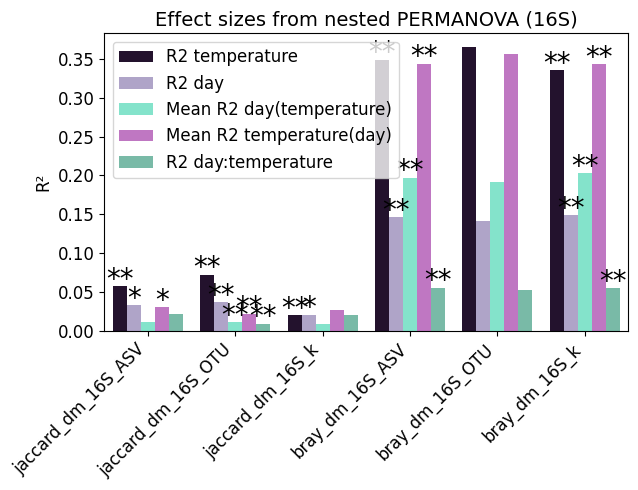

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'jaccard_dm_16S_ASV',
    'jaccard_dm_16S_OTU',
    'jaccard_dm_16S_k',
    'bray_dm_16S_ASV',
    'bray_dm_16S_OTU',
    'bray_dm_16S_k'
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)',
        'R2 day:temperature'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)',
    'R2 day:temperature': 'p day:temperature'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF',  # Green
    'R2 day:temperature': '#6EC5ABFF'  # Purple
}

# Plot with bar handle
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.01,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (16S)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250618_nested_permanova_effect_sizes_16S_qiime.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [117]:
print(melted[melted['Matrix'] == 'bray_dm_16S_ASV'])

Empty DataFrame
Columns: [Matrix, Factor, R2, Significance]
Index: []


and visualize per day/ per temperature

In [40]:
selected_matrices1 = [
 'jaccard_dm_16S_ASV',
 'jaccard_dm_16S_OTU',
 'jaccard_dm_16S_k',
 'bray_dm_16S_ASV',
 'bray_dm_16S_OTU',
 'bray_dm_16S_k'
]

In [99]:
selected_matrices

['jaccard_dm_16S_ASV',
 'jaccard_dm_16S_OTU',
 'jaccard_dm_16S_k',
 'bray_dm_16S_ASV',
 'bray_dm_16S_OTU',
 'bray_dm_16S_k']

In [43]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_temperature_beta_16S.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices1)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'temperature'],
    value_vars=['PERMANOVA R2 day(temperature)', 'p day(temperature)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'temperature', 'R2']], p_df[['Matrix', 'temperature', 'p_value']], on=['Matrix', 'temperature'])
base_colors = {
    '4': '#9EC8FFFF',
    '17': '#FDC067FF',
    '30': '#751C6DFF'
}

# base_colors = {
#     '#FDC067FF',
#     '#9EC8FFFF',
    
#     '#751C6DFF'
# }

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)



# Plot per temperature
plt.figure(figsize=(6.5, 5))
plot_df['temperature'] = pd.Categorical(
    plot_df['temperature'].astype(str),
    categories=['4', '17', '30'],
    ordered=True
)
plot_df['Matrix'] = plot_df['Matrix'].astype(str).str.strip()
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices1, ordered=True)



ax = sns.barplot(
    data=plot_df,
    x='Matrix',
    y='R2',
    hue='temperature',
    palette=base_colors
)



# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.3 , row['Significance'], ha='center', va='bottom', fontsize=20)

plt.title("PERMANOVA: Day nested in temperature", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Temperature (°C)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_temperature_16S.pdf", format='pdf', bbox_inches='tight')
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['temperature', 'PERMANOVA R2 day(temperature)', 'p day(temperature)']"

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


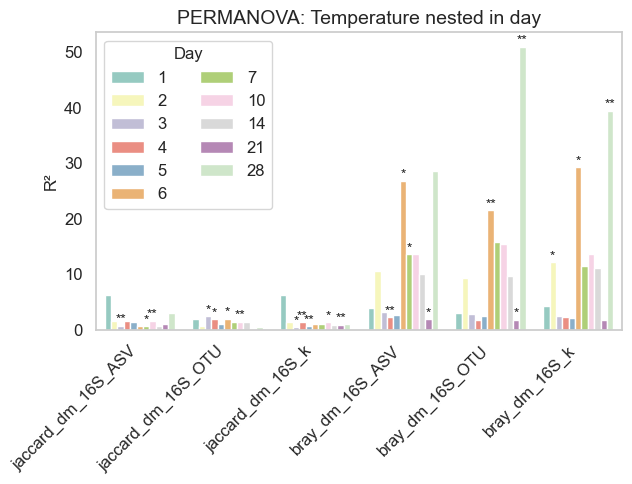

In [174]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250514_nested_permanova_per_day_temperature_beta_16S.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'day'],
    value_vars=['PERMANOVA R2 temperature(day)', 'p temperature(day)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'day', 'R2']], p_df[['Matrix', 'day', 'p_value']], on=['Matrix', 'day'])

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices1, ordered=True)

# Set color palette with 11 different colors:
palette = sns.color_palette("Set3", 11) 


# Plot per temperature
plt.figure(figsize=(6.5, 5))
ax = sns.barplot(data=plot_df, x='Matrix', y='R2', hue='day', palette=palette)

# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.1, row['Significance'], ha='center', va='bottom', fontsize=10)

plt.title("PERMANOVA: Temperature nested in day", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Day', fontsize=12, ncol=2)
plt.xlabel("", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250514_nested_permanova_effect_sizes_per_day_16S.pdf", format='pdf', bbox_inches='tight')
plt.show()